In [1]:
import os
import math
import dill
from itertools import permutations

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import HuberRegressor as hubreg
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pingouin import mixed_anova, anova, pairwise_tukey


import suite2p as s2p

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u
from STX3KO_analyses.single_cell_stats import CellStats 

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [8]:
figdir = "/mnt/BigDisk/YMazeResults/neural/wta_comparisons"
os.makedirs(figdir,exist_ok=True)

In [3]:
fam_cell_stats = CellStats(fam=True)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 2}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1, 'ravel_ind': 3}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1, 'ravel_ind': 4}
{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 6}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel': 1, 'ravel_ind': 0}
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1, 'ravel_ind': 1}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 2}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 3}
{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 9, 'novel': 1, '

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


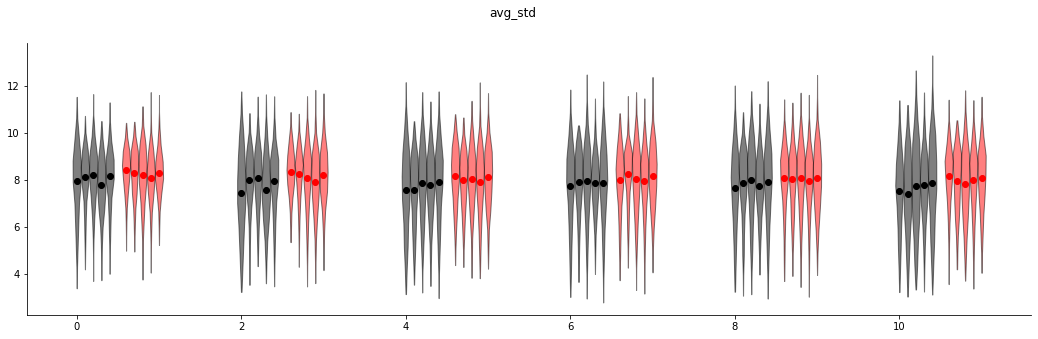

In [10]:
fig,ax = fam_cell_stats.violin_plots('avg_std')
fig.savefig(os.path.join(figdir, 'fam_avg_std_violin.pdf'),format = 'pdf')

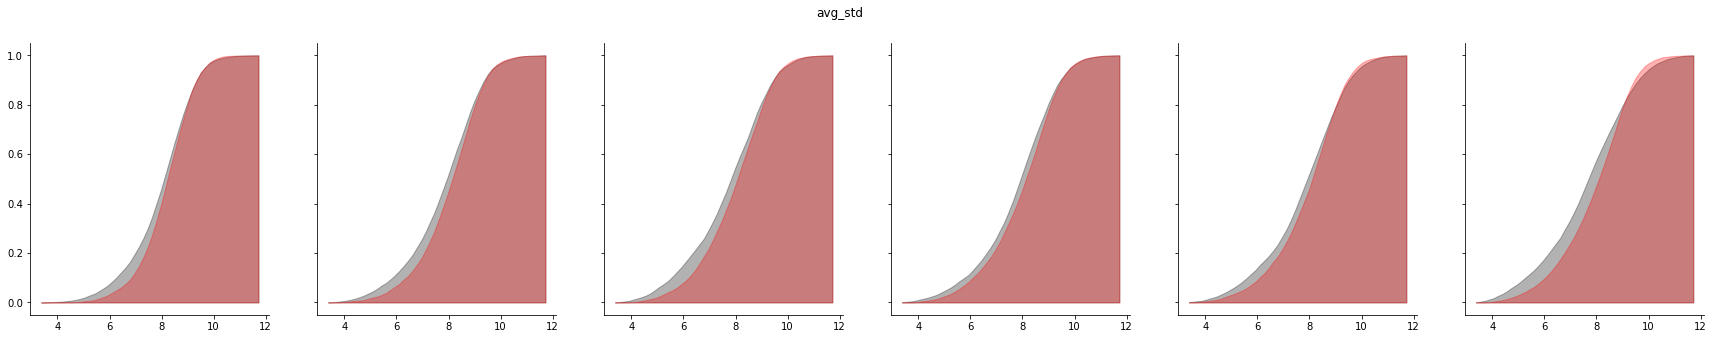

In [11]:
fig, ax = fam_cell_stats.combined_hist('avg_std', cumulative=True, smooth=True)
fig.savefig(os.path.join(figdir, 'fam_avg_std_cumhist.pdf'),format = 'pdf')

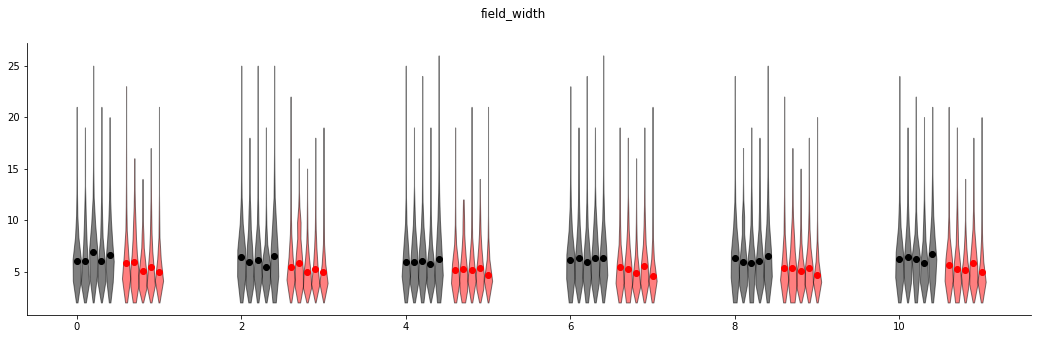

In [13]:
fig,ax = fam_cell_stats.violin_plots('field_width')
fig.savefig(os.path.join(figdir, 'fam_field_width_violin.pdf'),format = 'pdf')

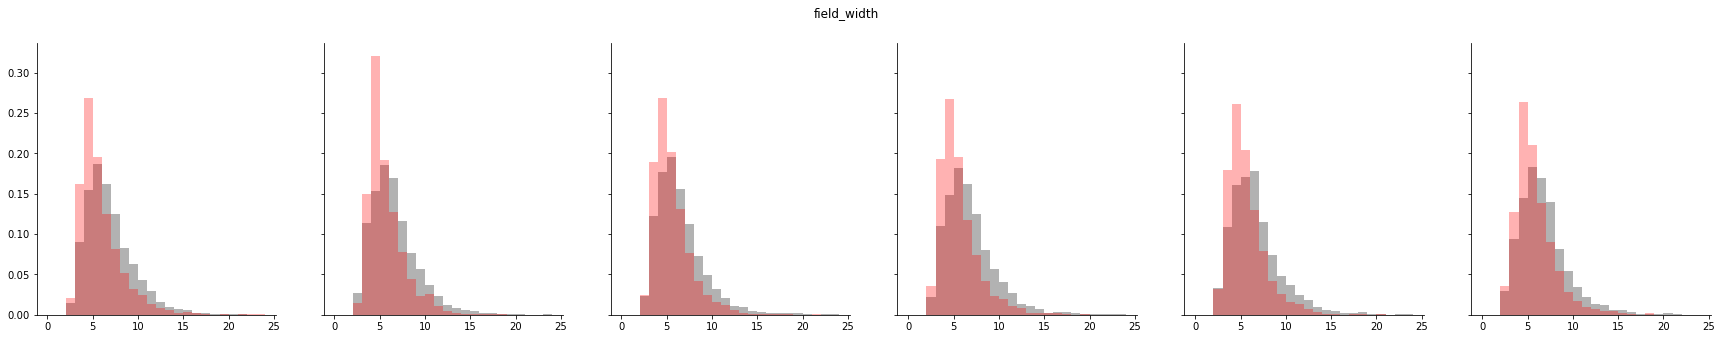

In [17]:
fig, ax = fam_cell_stats.combined_hist('field_width', cumulative=False, smooth=False, bins = np.arange(0,25))
fig.savefig(os.path.join(figdir, 'fam_field_width_hist.pdf'),format = 'pdf')

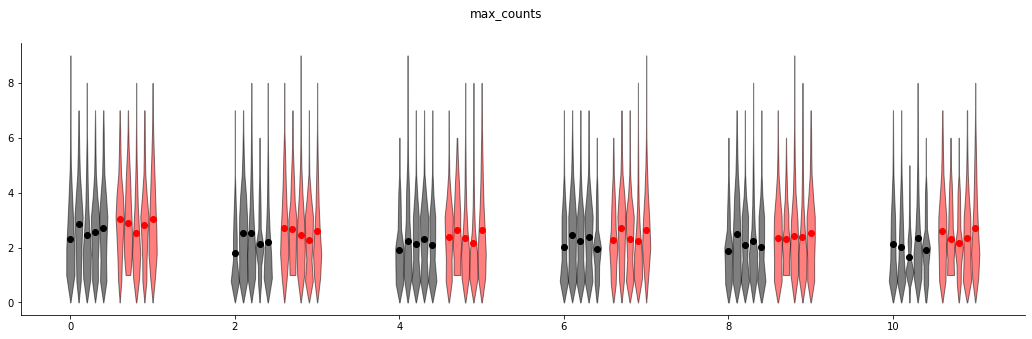

In [18]:
fig,ax = fam_cell_stats.violin_plots('max_counts')
fig.savefig(os.path.join(figdir, 'fam_max_counts_violin.pdf'),format = 'pdf')

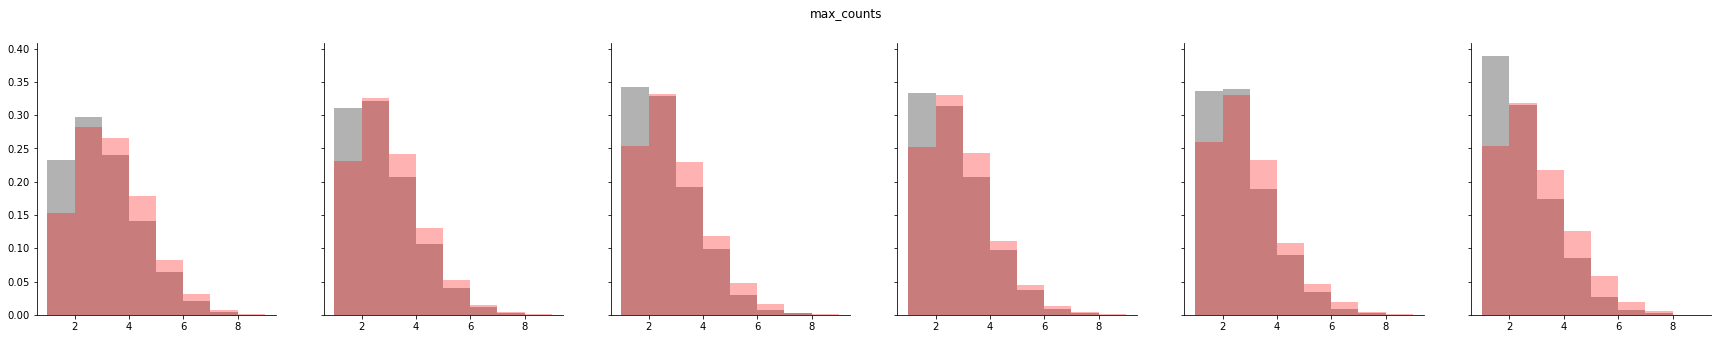

In [20]:
fig, ax = fam_cell_stats.combined_hist('max_counts', cumulative=False, smooth=False, bins = np.arange(1,10))
fig.savefig(os.path.join(figdir, 'fam_max_counts_hist.pdf'),format = 'pdf')

In [21]:
fam_cell_stats.mixed_anova('max_counts')

Mixed design ANOVA results
        Source        SS  DF1  DF2        MS          F         p-unc  \
0      ko_ctrl  1.361314    1    8  1.361314   9.714457  1.429764e-02   
1          day  1.650106    5   40  0.330021  11.946566  4.153514e-07   
2  Interaction  0.063289    5   40  0.012658   0.458204  8.048276e-01   

        np2       eps  
0  0.548391       NaN  
1  0.598928  0.517479  
2  0.054173       NaN  
PostHoc Tukey: KO vs Ctrl
   A  B   mean(A)  mean(B)      diff        se         T  p-tukey    hedges
0  0  1  2.519495  2.21824  0.301255  0.067291  4.476881    0.001  1.140914
PostHov Tukey on each day
Day 0
   A  B   mean(A)   mean(B)      diff        se         T  p-tukey    hedges
0  0  1  2.860786  2.581563  0.279223  0.131874  2.117349   0.0671  1.209536
Day 1
   A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
0  0  1  2.550748  2.233077  0.317671  0.157671  2.014765  0.078697  1.150935
Day 2
   A  B   mean(A)   mean(B)      diff        se     

{'anova':         Source        SS  DF1  DF2        MS          F         p-unc  \
 0      ko_ctrl  1.361314    1    8  1.361314   9.714457  1.429764e-02   
 1          day  1.650106    5   40  0.330021  11.946566  4.153514e-07   
 2  Interaction  0.063289    5   40  0.012658   0.458204  8.048276e-01   
 
         np2       eps  
 0  0.548391       NaN  
 1  0.598928  0.517479  
 2  0.054173       NaN  ,
 'ko_ctrl_tukey':    A  B   mean(A)  mean(B)      diff        se         T  p-tukey    hedges
 0  0  1  2.519495  2.21824  0.301255  0.067291  4.476881    0.001  1.140914,
 'day_tukey': [   A  B   mean(A)   mean(B)      diff        se         T  p-tukey    hedges
  0  0  1  2.860786  2.581563  0.279223  0.131874  2.117349   0.0671  1.209536,
     A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
  0  0  1  2.550748  2.233077  0.317671  0.157671  2.014765  0.078697  1.150935,
     A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
  0  0 

/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:299: RuntimeWarning: Mean of empty slice
  ko_mu, ko_sem = np.nanmean(ko_mu_arr, axis=0), sp.stats.sem(ko_mu_arr, axis=0, nan_policy='omit')
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:300: RuntimeWarning: Mean of empty slice
  ctrl_mu, ctrl_sem = np.nanmean(ctrl_mu_arr, axis=0), sp.stats.sem(ctrl_mu_arr, axis=0, nan_policy='omit')


(<Figure size 2160x720 with 12 Axes>,
 array([[<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>],
        [<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>]], dtype=object))

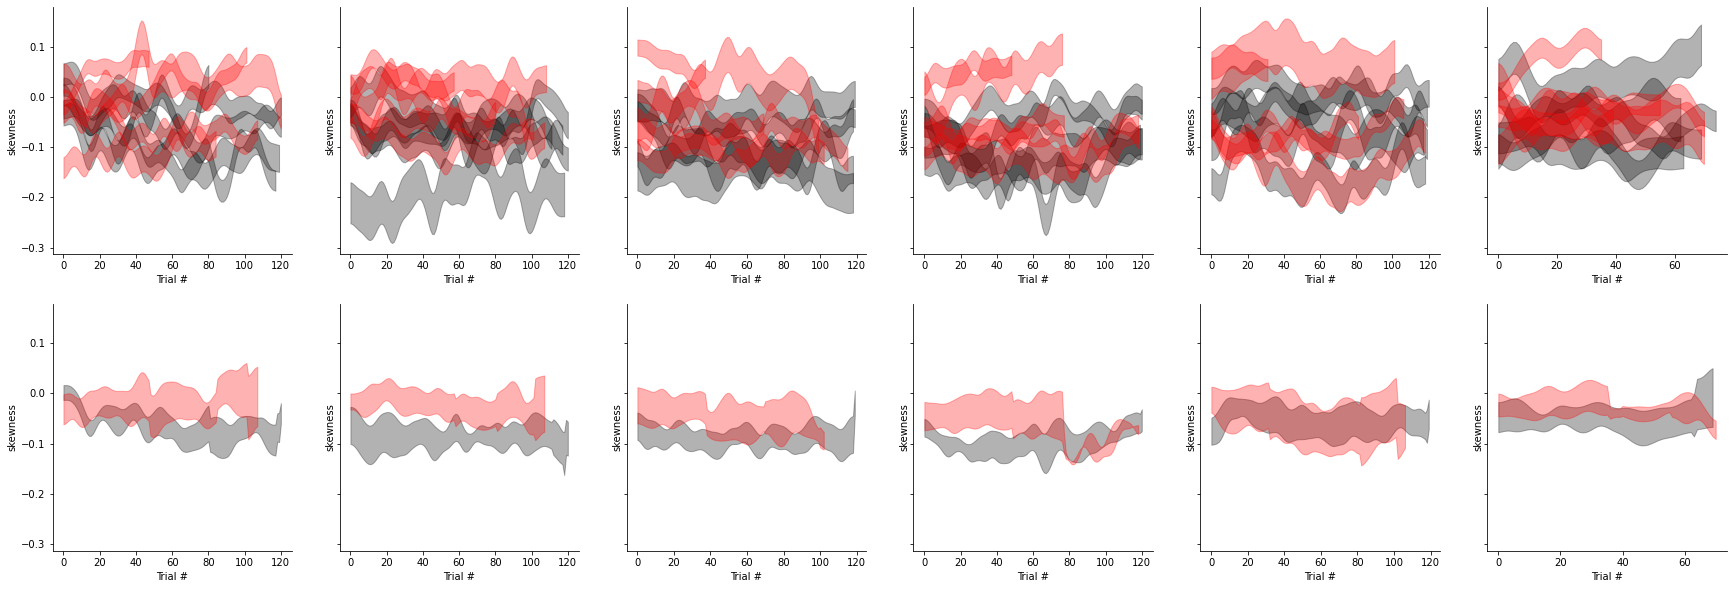

In [7]:
fam_cell_stats.across_trial_plot('skewness')

In [22]:
nov_cell_stats = CellStats(fam=False)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 2}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1, 'ravel_ind': 3}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1, 'ravel_ind': 4}
{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 6}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel': 1, 'ravel_ind': 0}
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1, 'ravel_ind': 1}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 2}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 3}
{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 9, 'novel': 1, '

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


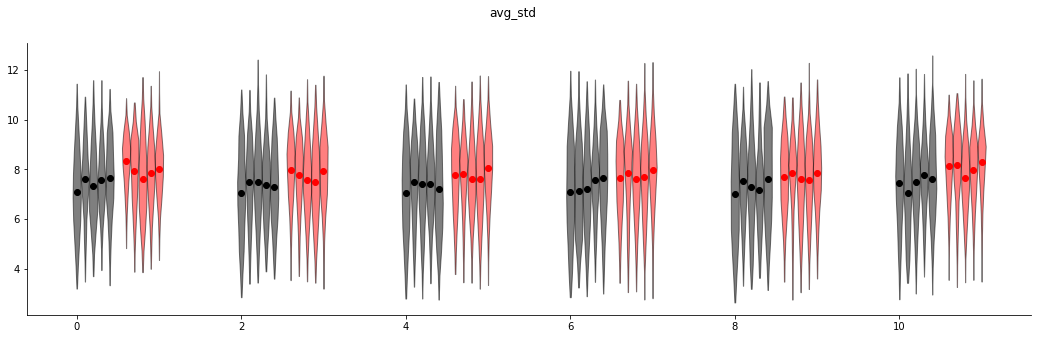

In [23]:
fig,ax = nov_cell_stats.violin_plots('avg_std')
fig.savefig(os.path.join(figdir, 'nov_avg_std_violin.pdf'),format = 'pdf')

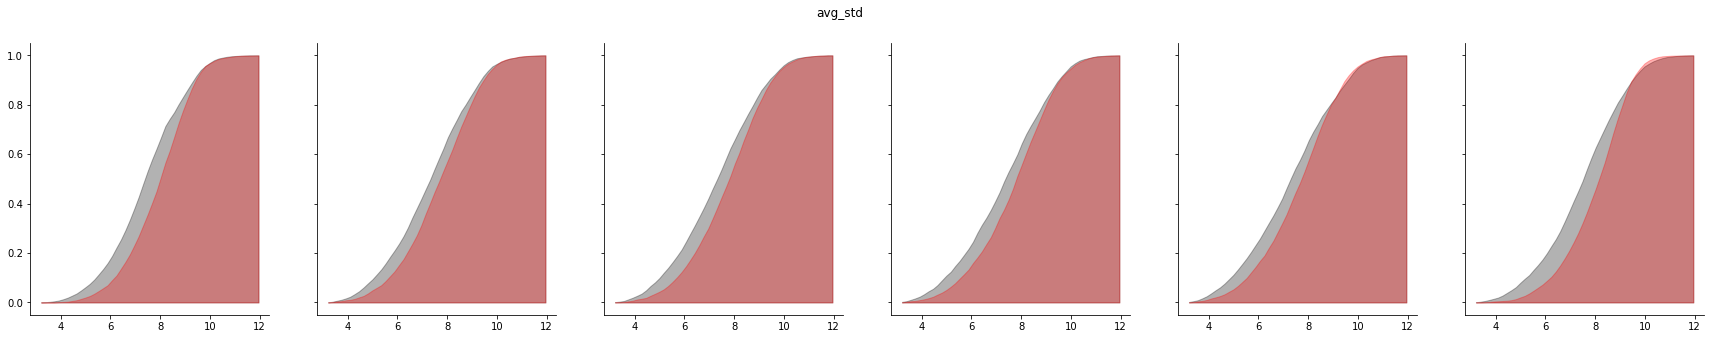

In [24]:
fig, ax = nov_cell_stats.combined_hist('avg_std', cumulative=True, smooth=True)
fig.savefig(os.path.join(figdir, 'nov_avg_std_cumhist.pdf'),format = 'pdf')

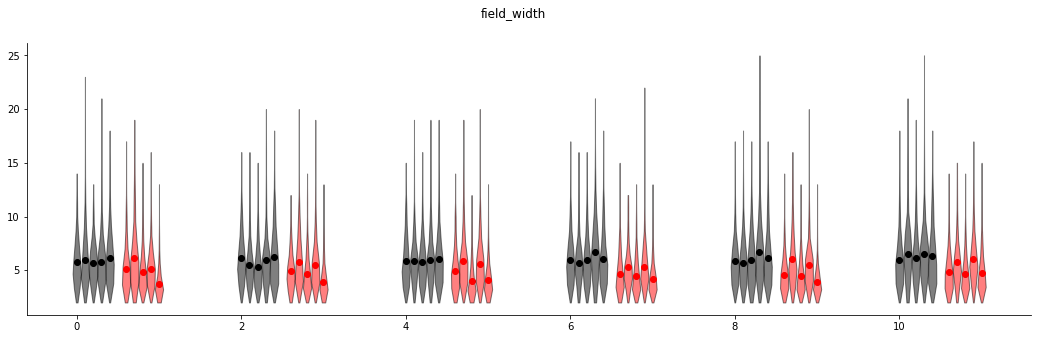

In [25]:
fig,ax = nov_cell_stats.violin_plots('field_width')
fig.savefig(os.path.join(figdir, 'nov_field_width_violin.pdf'),format = 'pdf')

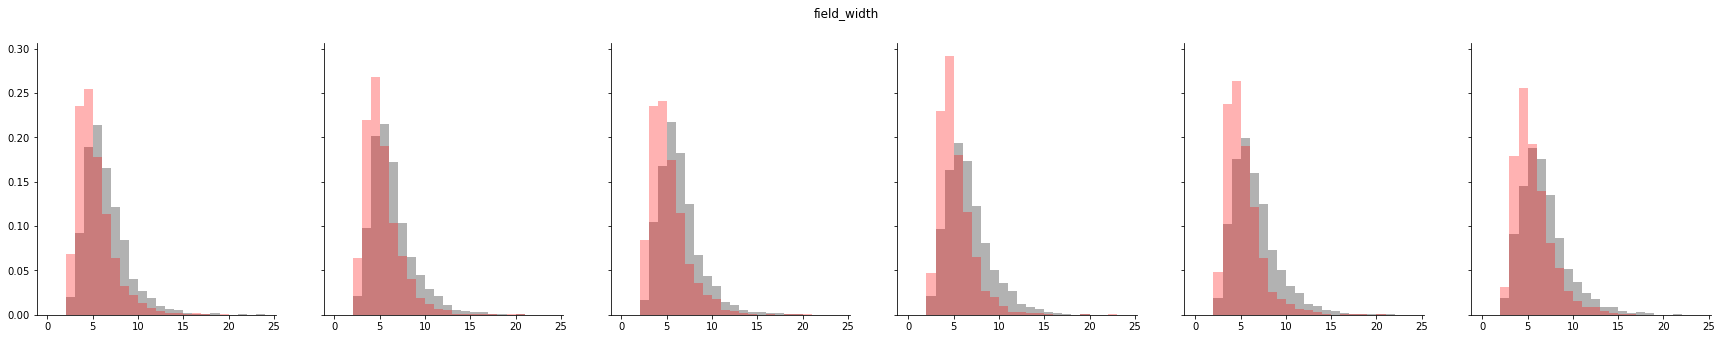

In [26]:
fig, ax = nov_cell_stats.combined_hist('field_width', cumulative=False, smooth=False, bins = np.arange(0,25))
fig.savefig(os.path.join(figdir, 'nov_field_width_hist.pdf'),format = 'pdf')

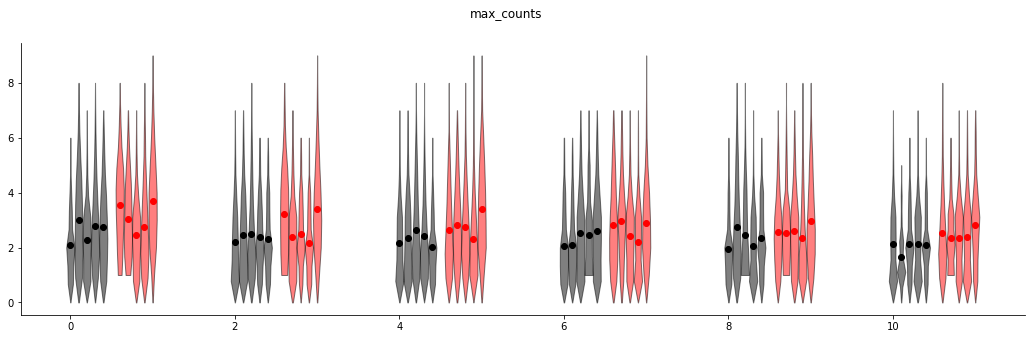

In [27]:
fig,ax = nov_cell_stats.violin_plots('max_counts')
fig.savefig(os.path.join(figdir, 'nov_max_counts_violin.pdf'),format = 'pdf')

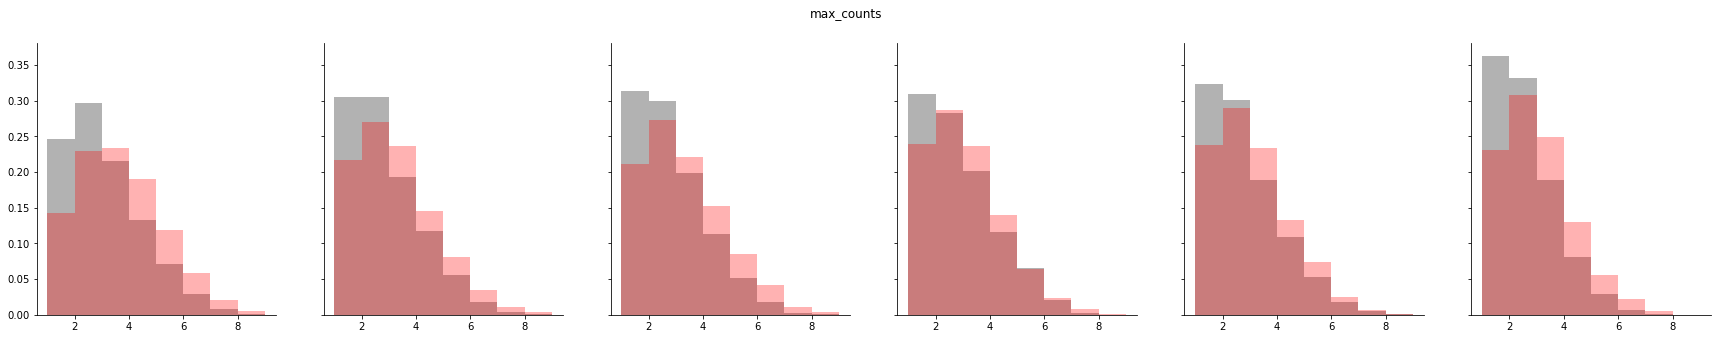

In [28]:
fig, ax = nov_cell_stats.combined_hist('max_counts', cumulative=False, smooth=False, bins = np.arange(1,10))
fig.savefig(os.path.join(figdir, 'nov_max_counts_hist.pdf'),format = 'pdf')

In [29]:
nov_cell_stats.mixed_anova('max_counts')

Mixed design ANOVA results
        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0      ko_ctrl  2.347098    1    8  2.347098  6.155093  0.038055  0.434832   
1          day  1.728518    5   40  0.345704  5.625733  0.000512  0.412876   
2  Interaction  0.110996    5   40  0.022199  0.361253  0.871902  0.043206   

        eps  
0       NaN  
1  0.723608  
2       NaN  
PostHoc Tukey: KO vs Ctrl
   A  B   mean(A)   mean(B)      diff        se         T  p-tukey    hedges
0  0  1  2.724755  2.329188  0.395567  0.091903  4.304185    0.001  1.096903
PostHov Tukey on each day
Day 0
   A  B   mean(A)  mean(B)      diff        se         T  p-tukey    hedges
0  0  1  3.093395  2.57588  0.517516  0.291912  1.772851  0.11419  1.012741
Day 1
   A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
0  0  1  2.730641  2.368539  0.362102  0.248573  1.456722  0.183293  0.832153
Day 2
   A  B   mean(A)   mean(B)      diff        se         T   p-tukey    h

{'anova':         Source        SS  DF1  DF2        MS         F     p-unc       np2  \
 0      ko_ctrl  2.347098    1    8  2.347098  6.155093  0.038055  0.434832   
 1          day  1.728518    5   40  0.345704  5.625733  0.000512  0.412876   
 2  Interaction  0.110996    5   40  0.022199  0.361253  0.871902  0.043206   
 
         eps  
 0       NaN  
 1  0.723608  
 2       NaN  ,
 'ko_ctrl_tukey':    A  B   mean(A)   mean(B)      diff        se         T  p-tukey    hedges
 0  0  1  2.724755  2.329188  0.395567  0.091903  4.304185    0.001  1.096903,
 'day_tukey': [   A  B   mean(A)  mean(B)      diff        se         T  p-tukey    hedges
  0  0  1  3.093395  2.57588  0.517516  0.291912  1.772851  0.11419  1.012741,
     A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
  0  0  1  2.730641  2.368539  0.362102  0.248573  1.456722  0.183293  0.832153,
     A  B   mean(A)   mean(B)      diff        se         T   p-tukey    hedges
  0  0  1  2.784757  2.3198

/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:299: RuntimeWarning: Mean of empty slice
  ko_mu, ko_sem = np.nanmean(ko_mu_arr, axis=0), sp.stats.sem(ko_mu_arr, axis=0, nan_policy='omit')
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/single_cell_stats.py:300: RuntimeWarning: Mean of empty slice
  ctrl_mu, ctrl_sem = np.nanmean(ctrl_mu_arr, axis=0), sp.stats.sem(ctrl_mu_arr, axis=0, nan_policy='omit')


(<Figure size 2160x720 with 12 Axes>,
 array([[<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>],
        [<AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>,
         <AxesSubplot:xlabel='Trial #', ylabel='skewness'>]], dtype=object))

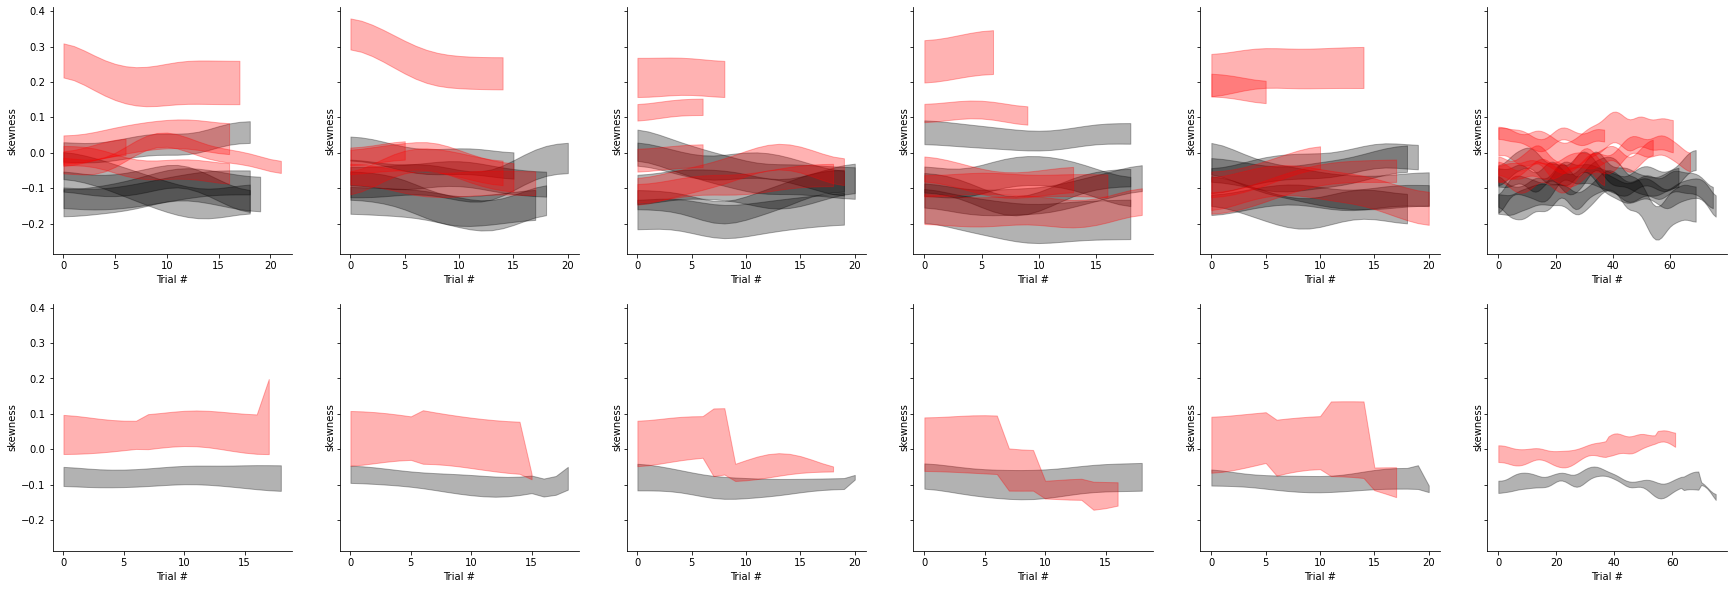

In [42]:
nov_cell_stats.across_trial_plot('skewness')